# Stock Market Prediction of Nikkei 225 companies using Machine Learning Techniques

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("Nikkei225.csv")
data

,Date,Price,Open,High,Low,Vol.,Change %
0,06/28/2024,"39,583.08","39,593.01","39,783.70","39,485.73",1.24B,0.61%
1,06/27/2024,"39,341.54","39,434.47","39,439.24","39,193.51",1.15B,-0.82%
2,06/26/2024,"39,667.07","39,364.73","39,788.63","39,233.56",1.09B,1.26%
3,06/25/2024,"39,173.15","38,833.90","39,215.07","38,758.07",1.08B,0.95%
4,06/24/2024,"38,804.65","38,497.42","38,905.47","38,416.07",934.57M,0.54%
...,...,...,...,...,...,...,...
4056,01/10/2008,"14,388.11","14,546.32","14,584.73","14,388.11",NaN,-1.45%
4057,01/09/2008,"14,599.16","14,364.71","14,602.65","14,271.57",NaN,0.49%
4058,01/08/2008,"14,528.67","14,429.30","14,547.80","14,365.86",NaN,0.19%
4059,01/07/2008,"14,500.55","14,549.38","14,667.85","14,438.61",NaN,-1.30%


In [3]:
data.shape

(4061, 7)

In [4]:
data=data.drop(columns=['Date'])
data

,Price,Open,High,Low,Vol.,Change %
0,"39,583.08","39,593.01","39,783.70","39,485.73",1.24B,0.61%
1,"39,341.54","39,434.47","39,439.24","39,193.51",1.15B,-0.82%
2,"39,667.07","39,364.73","39,788.63","39,233.56",1.09B,1.26%
3,"39,173.15","38,833.90","39,215.07","38,758.07",1.08B,0.95%
4,"38,804.65","38,497.42","38,905.47","38,416.07",934.57M,0.54%
...,...,...,...,...,...,...
4056,"14,388.11","14,546.32","14,584.73","14,388.11",NaN,-1.45%
4057,"14,599.16","14,364.71","14,602.65","14,271.57",NaN,0.49%
4058,"14,528.67","14,429.30","14,547.80","14,365.86",NaN,0.19%
4059,"14,500.55","14,549.38","14,667.85","14,438.61",NaN,-1.30%


In [5]:
data.describe()

,Price,Open,High,Low,Vol.,Change %
count,4061,4061,4061,4061,3180,4061
unique,4057,4025,4034,4031,2526,690
top,"9,653.92","9,404.00","9,726.50","9,376.50",1.06B,0.09%
freq,2,3,4,3,21,29


In [6]:
data.isnull().sum()

Price         0
Open          0
High          0
Low           0
Vol.        881
Change %      0
dtype: int64

In [7]:
df=data.dropna()
df

,Price,Open,High,Low,Vol.,Change %
0,"39,583.08","39,593.01","39,783.70","39,485.73",1.24B,0.61%
1,"39,341.54","39,434.47","39,439.24","39,193.51",1.15B,-0.82%
2,"39,667.07","39,364.73","39,788.63","39,233.56",1.09B,1.26%
3,"39,173.15","38,833.90","39,215.07","38,758.07",1.08B,0.95%
4,"38,804.65","38,497.42","38,905.47","38,416.07",934.57M,0.54%
...,...,...,...,...,...,...
3205,"10,071.14","10,048.00","10,103.50","10,028.50",133.18K,-0.11%
3206,"10,082.48","9,993.00","10,083.50","9,973.50",137.71K,1.10%
3207,"9,972.46","9,973.00","9,993.50","9,948.50",132.58K,0.07%
3208,"9,965.09","9,988.00","10,003.50","9,943.50",131.38K,0.98%


In [8]:
df.isnull().sum()

Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3180 entries, 0 to 3209
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Price     3180 non-null   object
 1   Open      3180 non-null   object
 2   High      3180 non-null   object
 3   Low       3180 non-null   object
 4   Vol.      3180 non-null   object
 5   Change %  3180 non-null   object
dtypes: object(6)
memory usage: 173.9+ KB


In [10]:
df.drop(columns=['Change %'],inplace=True)
df

C:\Users\SPANDAN CHATTERJEE\AppData\Local\Temp\ipykernel_13584\1658844372.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Change %'],inplace=True)


,Price,Open,High,Low,Vol.
0,"39,583.08","39,593.01","39,783.70","39,485.73",1.24B
1,"39,341.54","39,434.47","39,439.24","39,193.51",1.15B
2,"39,667.07","39,364.73","39,788.63","39,233.56",1.09B
3,"39,173.15","38,833.90","39,215.07","38,758.07",1.08B
4,"38,804.65","38,497.42","38,905.47","38,416.07",934.57M
...,...,...,...,...,...
3205,"10,071.14","10,048.00","10,103.50","10,028.50",133.18K
3206,"10,082.48","9,993.00","10,083.50","9,973.50",137.71K
3207,"9,972.46","9,973.00","9,993.50","9,948.50",132.58K
3208,"9,965.09","9,988.00","10,003.50","9,943.50",131.38K


In [11]:
df.sample(10)

,Price,Open,High,Low,Vol.
1582,"23,714.53","23,643.00","23,730.47","23,520.52",1.05B
2952,"8,755.00","8,740.98","8,808.87","8,711.73",111.98K
1799,"19,063.22","19,150.82","19,218.08","19,043.48",1.25B
722,"28,003.08","28,039.26","28,201.30","27,847.35",503.83M
2577,"14,980.16","15,038.64","15,088.12","14,952.83",183.07K
723,"28,279.09","28,539.32","28,571.72","28,240.21",532.04M
2779,"12,135.02","12,371.34","12,384.83","12,133.00",198.16K
304,"28,287.42","28,213.93","28,287.42","28,139.12",732.69M
2430,"15,424.59","15,423.88","15,447.81","15,356.00",111.03K
1836,"18,910.78","18,844.12","18,970.58","18,805.32",1.06B


In [12]:
def convert_vol(vol):
    if 'K' in vol:
        return float(vol.replace('K', ''))
    elif 'M' in vol:
        return float(vol.replace('M', '')) * 1000
    elif 'B' in vol:
        return float(vol.replace('B', '')) * 1000000
    else:
        return float(vol)/1000

def convert_to_num(dt):
    if ',' in dt:
        return float(dt.replace(',',''))
    else:
        return float(dt)

In [13]:
df['Volume(K)']=df['Vol.'].apply(convert_vol)
df

C:\Users\SPANDAN CHATTERJEE\AppData\Local\Temp\ipykernel_13584\3236443624.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Volume(K)']=df['Vol.'].apply(convert_vol)


,Price,Open,High,Low,Vol.,Volume(K)
0,"39,583.08","39,593.01","39,783.70","39,485.73",1.24B,1240000.00
1,"39,341.54","39,434.47","39,439.24","39,193.51",1.15B,1150000.00
2,"39,667.07","39,364.73","39,788.63","39,233.56",1.09B,1090000.00
3,"39,173.15","38,833.90","39,215.07","38,758.07",1.08B,1080000.00
4,"38,804.65","38,497.42","38,905.47","38,416.07",934.57M,934570.00
...,...,...,...,...,...,...
3205,"10,071.14","10,048.00","10,103.50","10,028.50",133.18K,133.18
3206,"10,082.48","9,993.00","10,083.50","9,973.50",137.71K,137.71
3207,"9,972.46","9,973.00","9,993.50","9,948.50",132.58K,132.58
3208,"9,965.09","9,988.00","10,003.50","9,943.50",131.38K,131.38


In [14]:
df['Price']=df['Price'].apply(convert_to_num)
df['Open']=df['Open'].apply(convert_to_num)
df['High']=df['High'].apply(convert_to_num)
df['Low']=df['Low'].apply(convert_to_num)
df

C:\Users\SPANDAN CHATTERJEE\AppData\Local\Temp\ipykernel_13584\1879019303.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price']=df['Price'].apply(convert_to_num)
C:\Users\SPANDAN CHATTERJEE\AppData\Local\Temp\ipykernel_13584\1879019303.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Open']=df['Open'].apply(convert_to_num)
C:\Users\SPANDAN CHATTERJEE\AppData\Local\Temp\ipykernel_13584\1879019303.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

,Price,Open,High,Low,Vol.,Volume(K)
0,39583.08,39593.01,39783.70,39485.73,1.24B,1240000.00
1,39341.54,39434.47,39439.24,39193.51,1.15B,1150000.00
2,39667.07,39364.73,39788.63,39233.56,1.09B,1090000.00
3,39173.15,38833.90,39215.07,38758.07,1.08B,1080000.00
4,38804.65,38497.42,38905.47,38416.07,934.57M,934570.00
...,...,...,...,...,...,...
3205,10071.14,10048.00,10103.50,10028.50,133.18K,133.18
3206,10082.48,9993.00,10083.50,9973.50,137.71K,137.71
3207,9972.46,9973.00,9993.50,9948.50,132.58K,132.58
3208,9965.09,9988.00,10003.50,9943.50,131.38K,131.38


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3180 entries, 0 to 3209
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      3180 non-null   float64
 1   Open       3180 non-null   float64
 2   High       3180 non-null   float64
 3   Low        3180 non-null   float64
 4   Vol.       3180 non-null   object 
 5   Volume(K)  3180 non-null   float64
dtypes: float64(5), object(1)
memory usage: 173.9+ KB


In [16]:
df.drop(columns=['Vol.'], inplace=True)
df

C:\Users\SPANDAN CHATTERJEE\AppData\Local\Temp\ipykernel_13584\1067798956.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Vol.'], inplace=True)


,Price,Open,High,Low,Volume(K)
0,39583.08,39593.01,39783.70,39485.73,1240000.00
1,39341.54,39434.47,39439.24,39193.51,1150000.00
2,39667.07,39364.73,39788.63,39233.56,1090000.00
3,39173.15,38833.90,39215.07,38758.07,1080000.00
4,38804.65,38497.42,38905.47,38416.07,934570.00
...,...,...,...,...,...
3205,10071.14,10048.00,10103.50,10028.50,133.18
3206,10082.48,9993.00,10083.50,9973.50,137.71
3207,9972.46,9973.00,9993.50,9948.50,132.58
3208,9965.09,9988.00,10003.50,9943.50,131.38


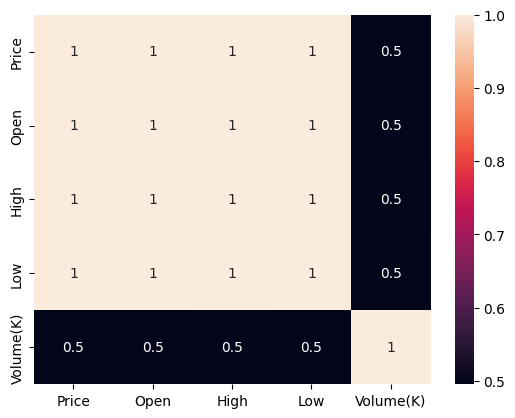

In [17]:
sns.heatmap(df.corr(),annot=True)
plt.show()

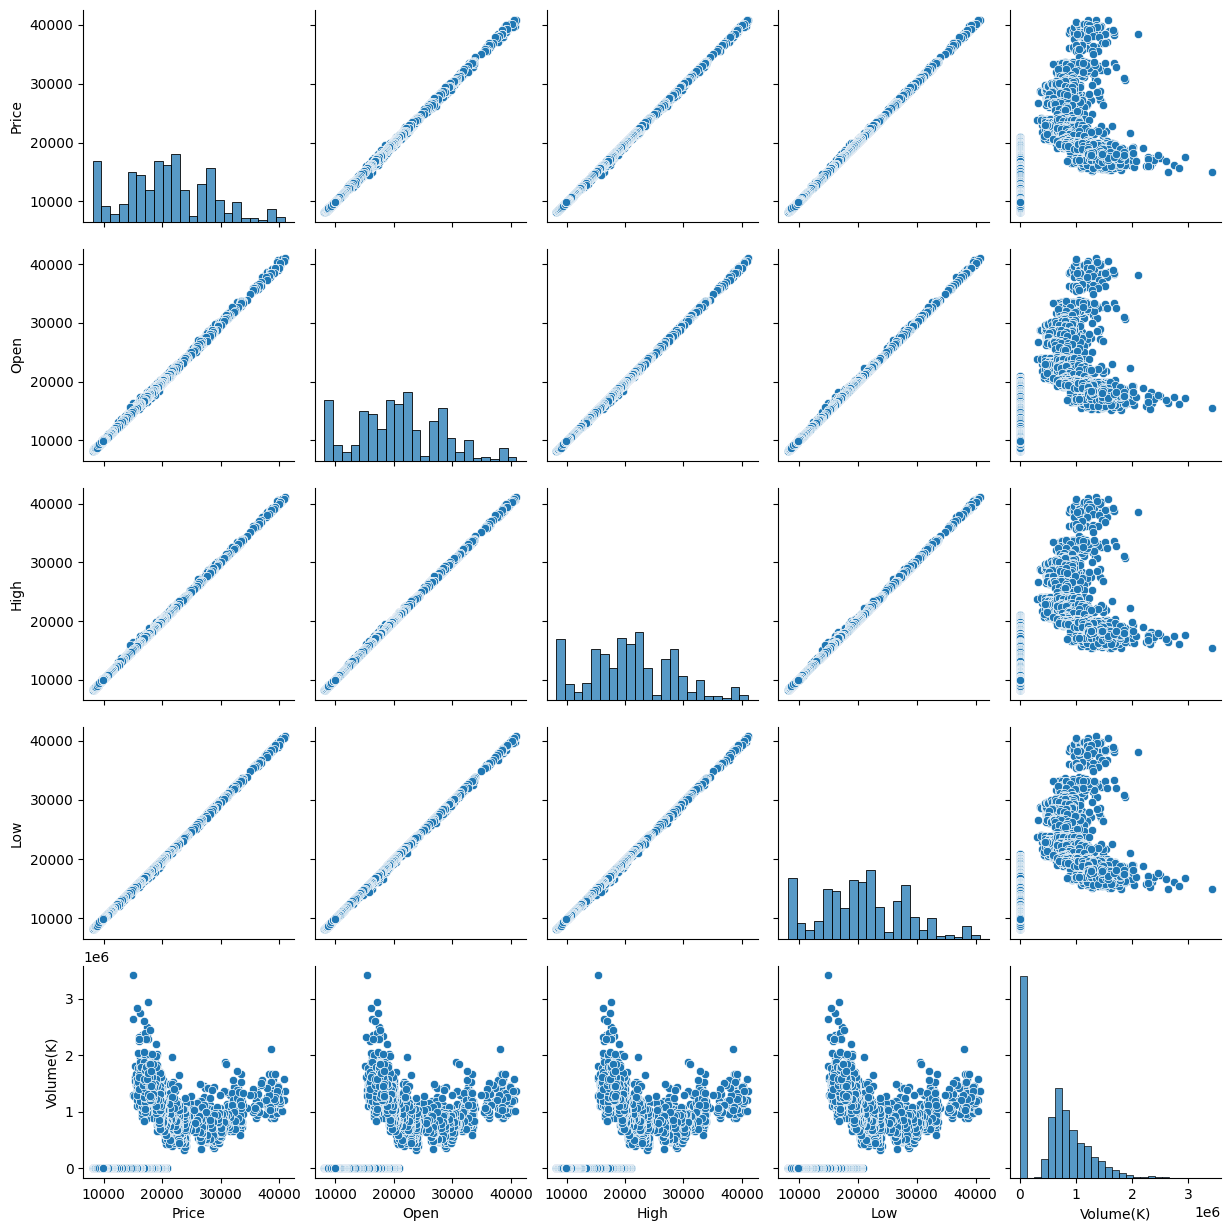

In [18]:
sns.pairplot(df,kind='scatter')
plt.show()

## Simple Linear Regression

## Taking Open as independent feature and close as dependent fearture

<function matplotlib.pyplot.show(close=None, block=None)>

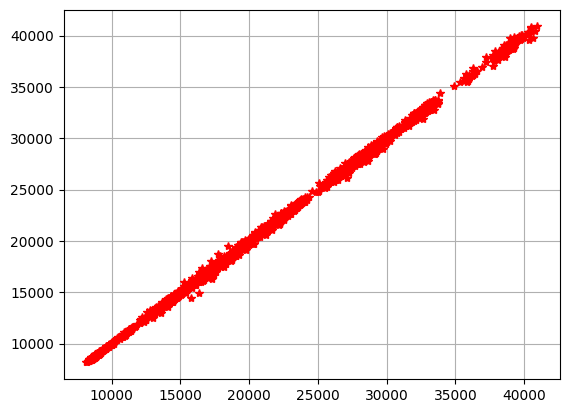

In [19]:
plt.plot(df['Open'],df['Price'],'r*')
plt.grid(True)
plt.show

In [20]:
X=df[['Open']]
X

,Open
0,39593.01
1,39434.47
2,39364.73
3,38833.90
4,38497.42
...,...
3205,10048.00
3206,9993.00
3207,9973.00
3208,9988.00


In [21]:
y=df['Price']
y

0       39583.08
1       39341.54
2       39667.07
3       39173.15
4       38804.65
          ...   
3205    10071.14
3206    10082.48
3207     9972.46
3208     9965.09
3209     9868.07
Name: Price, Length: 3180, dtype: float64

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [23]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [24]:
lr.fit(X_train,y_train)

LinearRegression()

In [25]:
print(f"Coefficient : {lr.coef_}\nintercept : {lr.intercept_}")

Coefficient : [0.99994026]
intercept : -0.5468180711541208


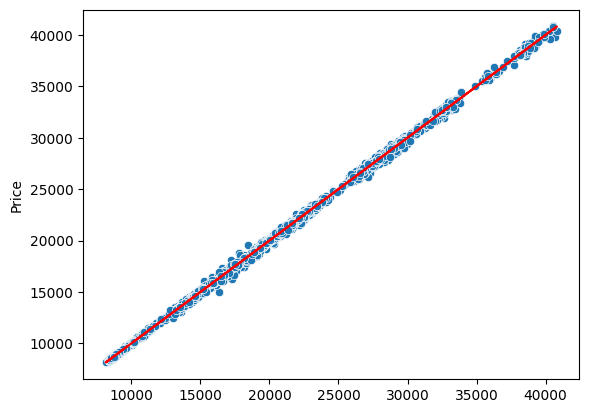

In [26]:
X_val=X_train['Open'].values
sns.scatterplot(x=X_val,y=y_train)
plt.plot(X_val,lr.predict(X_train),color='red')
plt.show()

In [27]:
pred=lr.predict(X_test)

In [28]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [29]:
import math
def find_RMSE(pred,actual):
    return math.sqrt(mean_squared_error(actual,pred))

def find_adj_r2(pred,actual):
    return 1-((1-r2_score(pred,actual))*(len(actual)-1)/(len(actual)-X_train.shape[1]-1))

In [30]:
print(f"MAE : {mean_absolute_error(y_test,pred)}\nMSE : {mean_squared_error(y_test,pred)}\nRMSE : {find_RMSE(pred,y_test)}\nR2 : {r2_score(y_test,pred)}\nAdj R2 : {find_adj_r2(pred,y_test)}")

MAE : 127.02508581945222
MSE : 32001.67578336471
RMSE : 178.89012209556097
R2 : 0.9994545164044996
Adj R2 : 0.9994522709594814


In [31]:
lr_mae=mean_absolute_error(y_test,pred)
lr_rmse=find_RMSE(pred,y_test)
lr_r2=r2_score(y_test,pred)

In [32]:
dt={
    'Simple_LinearReg' : [mean_absolute_error(y_test,pred)]}
mean_abs_err=pd.DataFrame(dt)
mean_abs_err

,Simple_LinearReg
0,127.025086


In [33]:
dt={
    'Simple_LinearReg' : [find_RMSE(pred,y_test)]
}
root_mean_sq_err=pd.DataFrame(dt)
root_mean_sq_err

,Simple_LinearReg
0,178.890122


In [34]:
dt={
    'Simple_LinearReg' : [r2_score(y_test,pred)]
}
R2_score=pd.DataFrame(dt)
R2_score

,Simple_LinearReg
0,0.999455


## Ridge Regression

In [35]:
from sklearn.linear_model import Ridge

In [36]:
rr=Ridge(alpha=0.1)

In [37]:
rr.fit(X_train,y_train)

Ridge(alpha=0.1)

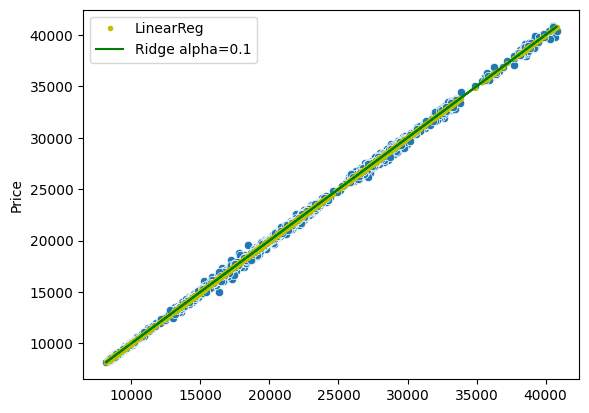

In [38]:
X_val=X_train['Open'].values
sns.scatterplot(x=X_val,y=y_train)
plt.plot(X_val,lr.predict(X_train),'y.',label='LinearReg')
plt.plot(X_val,rr.predict(X_train),color='green',label='Ridge alpha=0.1')
plt.legend()
plt.show()

In [39]:
print(rr.coef_,rr.intercept_)

[0.99994026] -0.5468180554271385


In [40]:
y_pred=rr.predict(X_test)

In [41]:
print(f"MAE : {mean_absolute_error(y_test,y_pred)}\nMSE : {mean_squared_error(y_test,y_pred)}\nRMSE : {find_RMSE(y_pred,y_test)}\nR2 : {r2_score(y_test,y_pred)}\nAdj R2 : {find_adj_r2(y_pred,y_test)}")

MAE : 127.02508581905924
MSE : 32001.67578346548
RMSE : 178.89012209584263
R2 : 0.9994545164044978
Adj R2 : 0.9994522709594789


In [42]:
rr_mae=mean_absolute_error(y_test,y_pred)
rr_rmse=find_RMSE(y_pred,y_test)
rr_r2=r2_score(y_test,y_pred)

In [43]:
mean_abs_err['Ridge_alpha_0.1']=[mean_absolute_error(y_test,y_pred)]
mean_abs_err

,Simple_LinearReg,Ridge_alpha_0.1
0,127.025086,127.025086


In [44]:
root_mean_sq_err['Ridge_alpha_0.1']=[find_RMSE(y_pred,y_test)]
root_mean_sq_err

,Simple_LinearReg,Ridge_alpha_0.1
0,178.890122,178.890122


In [45]:
R2_score['Ridge_alpha_0.1']=[r2_score(y_test,y_pred)]
R2_score

,Simple_LinearReg,Ridge_alpha_0.1
0,0.999455,0.999455


## Lasso Regression

In [46]:
from sklearn.linear_model import Lasso

In [47]:
lsr=Lasso(alpha=0.1)

In [48]:
lsr.fit(X_train,y_train)

Lasso(alpha=0.1)

In [49]:
print(lsr.coef_,lsr.intercept_)

[0.99994025] -0.546778048203123


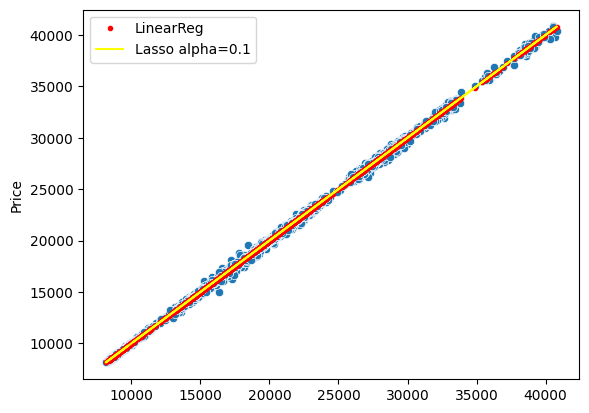

In [50]:
X_val=X_train['Open'].values
sns.scatterplot(x=X_val,y=y_train)
plt.plot(X_val,lr.predict(X_train),'r.',label='LinearReg')
plt.plot(X_val,lsr.predict(X_train),color='yellow',label='Lasso alpha=0.1')
plt.legend()
plt.show()

In [51]:
yl_pred=lsr.predict(X_test)

In [52]:
print(f"MAE : {mean_absolute_error(y_test,yl_pred)}\nMSE : {mean_squared_error(y_test,yl_pred)}\nRMSE : {find_RMSE(yl_pred,y_test)}\nR2 : {r2_score(y_test,yl_pred)}\nAdj R2 : {find_adj_r2(yl_pred,y_test)}")

MAE : 127.02508481942967
MSE : 32001.676039822967
RMSE : 178.8901228123648
R2 : 0.9994545164001281
Adj R2 : 0.999452270952977


In [53]:
lsr_mae=mean_absolute_error(y_test,yl_pred)
lsr_rmse=find_RMSE(yl_pred,y_test)
lsr_r2=r2_score(y_test,yl_pred)

In [54]:
mean_abs_err['Lasso_alpha_0.1']=[mean_absolute_error(y_test,yl_pred)]
mean_abs_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1
0,127.025086,127.025086,127.025085


In [55]:
root_mean_sq_err['Lasso_alpha_0.1']=[find_RMSE(yl_pred,y_test)]
root_mean_sq_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1
0,178.890122,178.890122,178.890123


In [56]:
R2_score['Lasso_alpha_0.1']=[r2_score(y_test,yl_pred)]
R2_score

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1
0,0.999455,0.999455,0.999455


## Polynomial Regression

In [57]:
from sklearn.preprocessing import PolynomialFeatures

In [58]:
poly=PolynomialFeatures(degree=4)

In [59]:
X_poly = poly.fit_transform(X_train)
X_test1=poly.transform(X_test)
poly.fit(X_poly,y_train)
lin=LinearRegression()
lin.fit(X_poly,y_train)

LinearRegression()

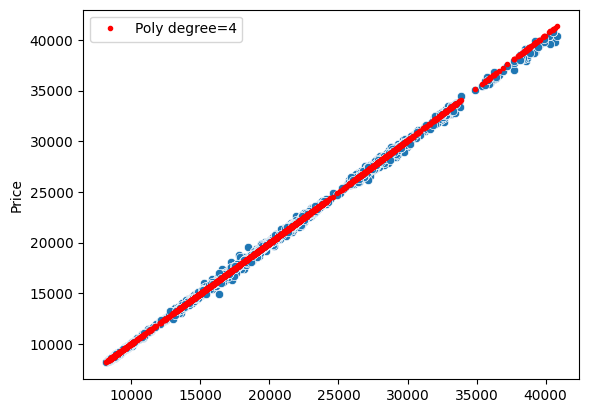

In [60]:
X_val=X_train['Open'].values
sns.scatterplot(x=X_val,y=y_train)
plt.plot(X_val,lin.predict(X_poly),'r.',label='Poly degree=4')
plt.legend()
plt.show()

In [61]:
yp_pred=lin.predict(X_test1)

In [62]:
print(f"MAE : {mean_absolute_error(y_test,yp_pred)}\nMSE : {mean_squared_error(y_test,yp_pred)}\nRMSE : {find_RMSE(yp_pred,y_test)}\nR2 : {r2_score(y_test,yp_pred)}\nAdj R2 : {find_adj_r2(yp_pred,y_test)}")

MAE : 143.7172715542743
MSE : 40199.69919117884
RMSE : 200.49862640721219
R2 : 0.9993147772447516
Adj R2 : 0.9993231614138639


In [63]:
poly_mae=mean_absolute_error(y_test,yp_pred)
poly_rmse=find_RMSE(yp_pred,y_test)
poly_r2=r2_score(y_test,yp_pred)

In [64]:
mean_abs_err['Poly_deg_4']=[mean_absolute_error(y_test,yp_pred)]
mean_abs_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4
0,127.025086,127.025086,127.025085,143.717272


In [65]:
root_mean_sq_err['Poly_deg_4']=[find_RMSE(yp_pred,y_test)]
root_mean_sq_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4
0,178.890122,178.890122,178.890123,200.498626


In [66]:
R2_score['Poly_deg_4']=r2_score(y_test,yp_pred)
R2_score

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4
0,0.999455,0.999455,0.999455,0.999315


## Ridge on Polynomial Regression

In [67]:
ridp=Ridge(alpha=0.1)
ridp.fit(X_poly,y_train)

C:\Users\SPANDAN CHATTERJEE\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=1.94123e-40): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Ridge(alpha=0.1)

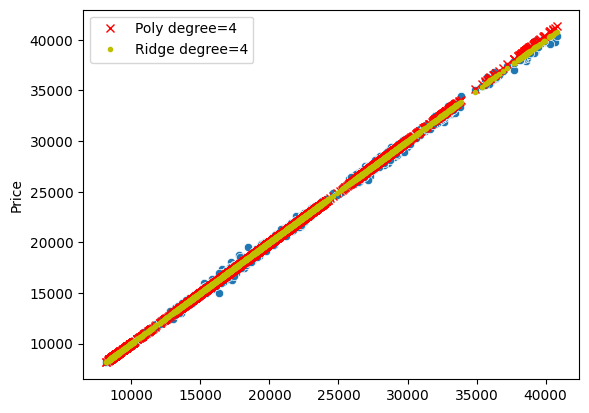

In [68]:
X_val=X_train['Open'].values
sns.scatterplot(x=X_val,y=y_train)
plt.plot(X_val,lin.predict(X_poly),'rx',label='Poly degree=4')
plt.plot(X_val,ridp.predict(X_poly),'y.',label='Ridge degree=4')
plt.legend()
plt.show()

In [69]:
yr_pred=ridp.predict(X_test1)

In [70]:
print(f"MAE : {mean_absolute_error(y_test,yr_pred)}\nMSE : {mean_squared_error(y_test,yr_pred)}\nRMSE : {find_RMSE(yr_pred,y_test)}\nR2 : {r2_score(y_test,yr_pred)}\nAdj R2 : {find_adj_r2(yr_pred,y_test)}")

MAE : 126.97464411494227
MSE : 31955.61103137723
RMSE : 178.76132420458634
R2 : 0.9994553015998346
Adj R2 : 0.9994530957485989


In [71]:
prr_mae=mean_absolute_error(y_test,yr_pred)
prr_rmse=find_RMSE(yr_pred,y_test)
prr_r2=r2_score(y_test,yr_pred)

In [72]:
mean_abs_err['Ridge_0.1_Poly_4']=[mean_absolute_error(y_test,yr_pred)]
mean_abs_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4
0,127.025086,127.025086,127.025085,143.717272,126.974644


In [73]:
root_mean_sq_err['Ridge_0.1_Poly_4']=[find_RMSE(yr_pred,y_test)]
root_mean_sq_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4
0,178.890122,178.890122,178.890123,200.498626,178.761324


In [74]:
R2_score['Ridge_0.1_Poly_4']=[r2_score(y_test,yr_pred)]
R2_score

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4
0,0.999455,0.999455,0.999455,0.999315,0.999455


## Lasso on polynomial of degree 4

In [75]:
lsp=Lasso(alpha=0.1)
lsp.fit(X_poly,y_train)

C:\Users\SPANDAN CHATTERJEE\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.268e+07, tolerance: 1.318e+07
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.1)

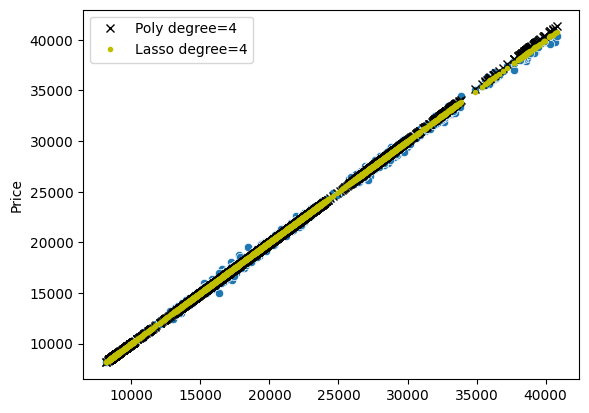

In [76]:
X_val=X_train['Open'].values
sns.scatterplot(x=X_val,y=y_train)
plt.plot(X_val,lin.predict(X_poly),'kx',label='Poly degree=4')
plt.plot(X_val,lsp.predict(X_poly),'y.',label='Lasso degree=4')
plt.legend()
plt.show()

In [77]:
yl_pred=lsp.predict(X_test1)

In [78]:
print(f"MAE : {mean_absolute_error(y_test,yl_pred)}\nMSE : {mean_squared_error(y_test,yl_pred)}\nRMSE : {find_RMSE(yl_pred,y_test)}\nR2 : {r2_score(y_test,yl_pred)}\nAdj R2 : {find_adj_r2(yl_pred,y_test)}")

MAE : 127.03754244868097
MSE : 31972.093070239443
RMSE : 178.80741894630503
R2 : 0.9994550206557403
Adj R2 : 0.9994528015764147


In [79]:
plsr_mae=mean_absolute_error(y_test,yl_pred)
plsr_rmse=find_RMSE(yl_pred,y_test)
plsr_r2=r2_score(y_test,yl_pred)

In [80]:
mean_abs_err['Lasso_0.1_Poly_4']=[mean_absolute_error(y_test,yl_pred)]
mean_abs_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4
0,127.025086,127.025086,127.025085,143.717272,126.974644,127.037542


In [81]:
root_mean_sq_err['Lasso_0.1_Poly_4']=[find_RMSE(yl_pred,y_test)]
root_mean_sq_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4
0,178.890122,178.890122,178.890123,200.498626,178.761324,178.807419


In [82]:
R2_score['Lasso_0.1_Poly_4']=[r2_score(y_test,yl_pred)]
R2_score

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4
0,0.999455,0.999455,0.999455,0.999315,0.999455,0.999455


## Multiple Linear Regression

In [83]:
df

,Price,Open,High,Low,Volume(K)
0,39583.08,39593.01,39783.70,39485.73,1240000.00
1,39341.54,39434.47,39439.24,39193.51,1150000.00
2,39667.07,39364.73,39788.63,39233.56,1090000.00
3,39173.15,38833.90,39215.07,38758.07,1080000.00
4,38804.65,38497.42,38905.47,38416.07,934570.00
...,...,...,...,...,...
3205,10071.14,10048.00,10103.50,10028.50,133.18
3206,10082.48,9993.00,10083.50,9973.50,137.71
3207,9972.46,9973.00,9993.50,9948.50,132.58
3208,9965.09,9988.00,10003.50,9943.50,131.38


In [84]:
df.drop(columns=['High','Low'],inplace=True)
df

C:\Users\SPANDAN CHATTERJEE\AppData\Local\Temp\ipykernel_13584\4086614560.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['High','Low'],inplace=True)


,Price,Open,Volume(K)
0,39583.08,39593.01,1240000.00
1,39341.54,39434.47,1150000.00
2,39667.07,39364.73,1090000.00
3,39173.15,38833.90,1080000.00
4,38804.65,38497.42,934570.00
...,...,...,...
3205,10071.14,10048.00,133.18
3206,10082.48,9993.00,137.71
3207,9972.46,9973.00,132.58
3208,9965.09,9988.00,131.38


In [85]:
X=df.drop(columns=['Price'])
X

,Open,Volume(K)
0,39593.01,1240000.00
1,39434.47,1150000.00
2,39364.73,1090000.00
3,38833.90,1080000.00
4,38497.42,934570.00
...,...,...
3205,10048.00,133.18
3206,9993.00,137.71
3207,9973.00,132.58
3208,9988.00,131.38


In [86]:
y=df['Price']
y

0       39583.08
1       39341.54
2       39667.07
3       39173.15
4       38804.65
          ...   
3205    10071.14
3206    10082.48
3207     9972.46
3208     9965.09
3209     9868.07
Name: Price, Length: 3180, dtype: float64

In [87]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [88]:
mlin=LinearRegression()
mlin.fit(X_train,y_train)

LinearRegression()

In [89]:
cdf=pd.DataFrame(mlin.coef_,X.columns,columns=['coef_lin'])
cdf

,coef_lin
Open,1.000487
Volume(K),-0.000015


In [90]:
mlin.intercept_

-2.283406292077416

In [91]:
pred=mlin.predict(X_test)

In [92]:
print(f"MAE : {mean_absolute_error(y_test,pred)}\nMSE : {mean_squared_error(y_test,pred)}\nRMSE : {find_RMSE(pred,y_test)}\nR2 : {r2_score(y_test,pred)}\nAdj R2 : {find_adj_r2(pred,y_test)}")

MAE : 126.99550545793086
MSE : 32008.05130425055
RMSE : 178.90794086415102
R2 : 0.9994544077307513
Adj R2 : 0.9994512775173782


In [93]:
mlr_mae=mean_absolute_error(y_test,pred)
mlr_rmse=find_RMSE(pred,y_test)
mlr_r2=r2_score(y_test,pred)

In [94]:
mean_abs_err['Mul_LinearReg']=[mean_absolute_error(y_test,pred)]
mean_abs_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg
0,127.025086,127.025086,127.025085,143.717272,126.974644,127.037542,126.995505


In [95]:
root_mean_sq_err['Mul_LinearReg'] = [find_RMSE(pred,y_test)]
root_mean_sq_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg
0,178.890122,178.890122,178.890123,200.498626,178.761324,178.807419,178.907941


In [96]:
R2_score['Mul_LinearReg']=[r2_score(y_test,pred)]
R2_score

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg
0,0.999455,0.999455,0.999455,0.999315,0.999455,0.999455,0.999454


## Applying Ridge Regression on Multiple Linear Regression

In [97]:
ridm=Ridge(alpha=0.1)
ridm.fit(X_train,y_train)

Ridge(alpha=0.1)

In [98]:
cdf['coef_ridge']=ridm.coef_
cdf

,coef_lin,coef_ridge
Open,1.000487,1.000487
Volume(K),-0.000015,-0.000015


In [99]:
ridm.intercept_

-2.2834062756119238

In [100]:
pred=ridm.predict(X_test)

In [101]:
print(f"MAE : {mean_absolute_error(y_test,pred)}\nMSE : {mean_squared_error(y_test,pred)}\nRMSE : {find_RMSE(pred,y_test)}\nR2 : {r2_score(y_test,pred)}\nAdj R2 : {find_adj_r2(pred,y_test)}")

MAE : 126.99550545757599
MSE : 32008.05130433252
RMSE : 178.90794086438007
R2 : 0.9994544077307499
Adj R2 : 0.999451277517376


In [102]:
mrr_mae=mean_absolute_error(y_test,pred)
mrr_rmse=find_RMSE(pred,y_test)
mrr_r2=r2_score(y_test,pred)

In [103]:
mean_abs_err['Mul_Ridge_0.1']=[mean_absolute_error(y_test,pred)]
mean_abs_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg,Mul_Ridge_0.1
0,127.025086,127.025086,127.025085,143.717272,126.974644,127.037542,126.995505,126.995505


In [104]:
root_mean_sq_err['Mul_Ridge_0.1']=[find_RMSE(pred,y_test)]
root_mean_sq_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg,Mul_Ridge_0.1
0,178.890122,178.890122,178.890123,200.498626,178.761324,178.807419,178.907941,178.907941


In [105]:
R2_score['Mul_Ridge_0.1']=[r2_score(y_test,pred)]
R2_score

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg,Mul_Ridge_0.1
0,0.999455,0.999455,0.999455,0.999315,0.999455,0.999455,0.999454,0.999454


## Applying Lasso Regression on Multiple Linear Regression

In [106]:
lso=Lasso(alpha=0.1)
lso.fit(X_train,y_train)

Lasso(alpha=0.1)

In [107]:
cdf['coef_lasso']=lso.coef_
cdf

,coef_lin,coef_ridge,coef_lasso
Open,1.000487,1.000487,1.000487
Volume(K),-0.000015,-0.000015,-0.000015


In [108]:
lso.intercept_

-2.2833454080646334

In [109]:
pred=lso.predict(X_test)

In [110]:
print(f"MAE : {mean_absolute_error(y_test,pred)}\nMSE : {mean_squared_error(y_test,pred)}\nRMSE : {find_RMSE(pred,y_test)}\nR2 : {r2_score(y_test,pred)}\nAdj R2 : {find_adj_r2(pred,y_test)}")

MAE : 126.99550414095594
MSE : 32008.051605974295
RMSE : 178.90794170738843
R2 : 0.9994544077256083
Adj R2 : 0.9994512775091586


In [111]:
mlsr_mae=mean_absolute_error(y_test,pred)
mlsr_rmse=find_RMSE(pred,y_test)
mlsr_r2=r2_score(y_test,pred)

In [112]:
mean_abs_err['Mul_Lasso_0.1']=[mean_absolute_error(y_test,pred)]
mean_abs_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg,Mul_Ridge_0.1,Mul_Lasso_0.1
0,127.025086,127.025086,127.025085,143.717272,126.974644,127.037542,126.995505,126.995505,126.995504


In [113]:
root_mean_sq_err['Mul_Lasso_0.1']=[find_RMSE(pred,y_test)]
root_mean_sq_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg,Mul_Ridge_0.1,Mul_Lasso_0.1
0,178.890122,178.890122,178.890123,200.498626,178.761324,178.807419,178.907941,178.907941,178.907942


In [114]:
R2_score['Mul_Lasso_0.1']=[r2_score(y_test,pred)]
R2_score

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg,Mul_Ridge_0.1,Mul_Lasso_0.1
0,0.999455,0.999455,0.999455,0.999315,0.999455,0.999455,0.999454,0.999454,0.999454


## Adding more features

In [115]:
df

,Price,Open,Volume(K)
0,39583.08,39593.01,1240000.00
1,39341.54,39434.47,1150000.00
2,39667.07,39364.73,1090000.00
3,39173.15,38833.90,1080000.00
4,38804.65,38497.42,934570.00
...,...,...,...
3205,10071.14,10048.00,133.18
3206,10082.48,9993.00,137.71
3207,9972.46,9973.00,132.58
3208,9965.09,9988.00,131.38


In [116]:
df['7DaysMavg']=df['Price'].rolling(window=7).mean().fillna(method='bfill')
df

C:\Users\SPANDAN CHATTERJEE\AppData\Local\Temp\ipykernel_13584\2831065476.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['7DaysMavg']=df['Price'].rolling(window=7).mean().fillna(method='bfill')
C:\Users\SPANDAN CHATTERJEE\AppData\Local\Temp\ipykernel_13584\2831065476.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['7DaysMavg']=df['Price'].rolling(window=7).mean().fillna(method='bfill')


,Price,Open,Volume(K),7DaysMavg
0,39583.08,39593.01,1240000.00,39114.140000
1,39341.54,39434.47,1150000.00,39114.140000
2,39667.07,39364.73,1090000.00,39114.140000
3,39173.15,38833.90,1080000.00,39114.140000
4,38804.65,38497.42,934570.00,39114.140000
...,...,...,...,...
3205,10071.14,10048.00,133.18,10011.150000
3206,10082.48,9993.00,137.71,10026.580000
3207,9972.46,9973.00,132.58,10031.771429
3208,9965.09,9988.00,131.38,10032.050000


In [117]:
df['14DaysMavg']=df['Price'].rolling(window=14).mean().fillna(method='bfill')
df

C:\Users\SPANDAN CHATTERJEE\AppData\Local\Temp\ipykernel_13584\1927853552.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['14DaysMavg']=df['Price'].rolling(window=14).mean().fillna(method='bfill')
C:\Users\SPANDAN CHATTERJEE\AppData\Local\Temp\ipykernel_13584\1927853552.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['14DaysMavg']=df['Price'].rolling(window=14).mean().fillna(method='bfill')


,Price,Open,Volume(K),7DaysMavg,14DaysMavg
0,39583.08,39593.01,1240000.00,39114.140000,38892.915714
1,39341.54,39434.47,1150000.00,39114.140000,38892.915714
2,39667.07,39364.73,1090000.00,39114.140000,38892.915714
3,39173.15,38833.90,1080000.00,39114.140000,38892.915714
4,38804.65,38497.42,934570.00,39114.140000,38892.915714
...,...,...,...,...,...
3205,10071.14,10048.00,133.18,10011.150000,10022.220714
3206,10082.48,9993.00,137.71,10026.580000,10024.741429
3207,9972.46,9973.00,132.58,10031.771429,10015.794286
3208,9965.09,9988.00,131.38,10032.050000,10009.728571


In [118]:
delta=df['Price'].diff()
gain=delta.where(delta>0,0)
loss=delta.where(delta<0,0)
avg_gain=gain.rolling(window=14).mean()
avg_loss=loss.rolling(window=14).mean()
rs=avg_gain/avg_loss
df['RSI']=100-(100/(1+rs))
df['RSI'].fillna(method='bfill',inplace=True)
df

C:\Users\SPANDAN CHATTERJEE\AppData\Local\Temp\ipykernel_13584\3173424381.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RSI']=100-(100/(1+rs))
C:\Users\SPANDAN CHATTERJEE\AppData\Local\Temp\ipykernel_13584\3173424381.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RSI']

,Price,Open,Volume(K),7DaysMavg,14DaysMavg,RSI
0,39583.08,39593.01,1240000.00,39114.140000,38892.915714,-332.043989
1,39341.54,39434.47,1150000.00,39114.140000,38892.915714,-332.043989
2,39667.07,39364.73,1090000.00,39114.140000,38892.915714,-332.043989
3,39173.15,38833.90,1080000.00,39114.140000,38892.915714,-332.043989
4,38804.65,38497.42,934570.00,39114.140000,38892.915714,-332.043989
...,...,...,...,...,...,...
3205,10071.14,10048.00,133.18,10011.150000,10022.220714,354.585076
3206,10082.48,9993.00,137.71,10026.580000,10024.741429,1324.879569
3207,9972.46,9973.00,132.58,10031.771429,10015.794286,-332.923519
3208,9965.09,9988.00,131.38,10032.050000,10009.728571,-491.073952


<Axes: >

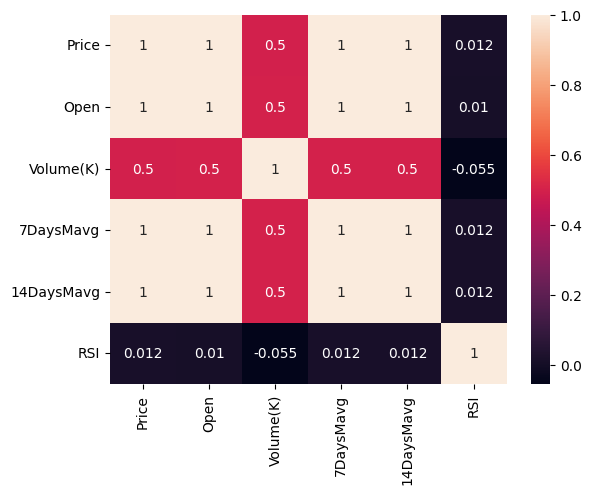

In [119]:
sns.heatmap(df.corr(),annot=True)

In [120]:
X=df.drop(columns='Price')
X

,Open,Volume(K),7DaysMavg,14DaysMavg,RSI
0,39593.01,1240000.00,39114.140000,38892.915714,-332.043989
1,39434.47,1150000.00,39114.140000,38892.915714,-332.043989
2,39364.73,1090000.00,39114.140000,38892.915714,-332.043989
3,38833.90,1080000.00,39114.140000,38892.915714,-332.043989
4,38497.42,934570.00,39114.140000,38892.915714,-332.043989
...,...,...,...,...,...
3205,10048.00,133.18,10011.150000,10022.220714,354.585076
3206,9993.00,137.71,10026.580000,10024.741429,1324.879569
3207,9973.00,132.58,10031.771429,10015.794286,-332.923519
3208,9988.00,131.38,10032.050000,10009.728571,-491.073952


In [121]:
y=df['Price']
y

0       39583.08
1       39341.54
2       39667.07
3       39173.15
4       38804.65
          ...   
3205    10071.14
3206    10082.48
3207     9972.46
3208     9965.09
3209     9868.07
Name: Price, Length: 3180, dtype: float64

In [122]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [123]:
mlin=LinearRegression()
mlin.fit(X_train,y_train)

LinearRegression()

In [124]:
cdf1=pd.DataFrame(mlin.coef_,X.columns,columns=['coef_lin'])
cdf1

,coef_lin
Open,0.773502
Volume(K),-0.000015
7DaysMavg,0.356338
14DaysMavg,-0.129380
RSI,0.000125


In [125]:
mlin.intercept_

-3.5144919076519727

In [126]:
pred=mlin.predict(X_test)

In [127]:
print(f"MAE : {mean_absolute_error(y_test,pred)}\nMSE : {mean_squared_error(y_test,pred)}\nRMSE : {find_RMSE(pred,y_test)}\nR2 : {r2_score(y_test,pred)}\nAdj R2 : {find_adj_r2(pred,y_test)}")

MAE : 115.23382847518958
MSE : 25607.298900589256
RMSE : 160.02280743878123
R2 : 0.9995635115620223
Adj R2 : 0.9995590395718241


In [128]:
mean_abs_err['Mul_LinearReg+']=[mean_absolute_error(y_test,pred)]
mean_abs_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg,Mul_Ridge_0.1,Mul_Lasso_0.1,Mul_LinearReg+
0,127.025086,127.025086,127.025085,143.717272,126.974644,127.037542,126.995505,126.995505,126.995504,115.233828


In [129]:
root_mean_sq_err['Mul_LinearReg+'] = [find_RMSE(pred,y_test)]
root_mean_sq_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg,Mul_Ridge_0.1,Mul_Lasso_0.1,Mul_LinearReg+
0,178.890122,178.890122,178.890123,200.498626,178.761324,178.807419,178.907941,178.907941,178.907942,160.022807


In [130]:
R2_score['Mul_LinearReg+']=[r2_score(y_test,pred)]
R2_score

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg,Mul_Ridge_0.1,Mul_Lasso_0.1,Mul_LinearReg+
0,0.999455,0.999455,0.999455,0.999315,0.999455,0.999455,0.999454,0.999454,0.999454,0.999564


## Ridge

In [131]:
ridm=Ridge(alpha=0.1)
ridm.fit(X_train,y_train)

Ridge(alpha=0.1)

In [132]:
cdf1['coef_ridge']=ridm.coef_
cdf1

,coef_lin,coef_ridge
Open,0.773502,0.773502
Volume(K),-0.000015,-0.000015
7DaysMavg,0.356338,0.356338
14DaysMavg,-0.129380,-0.129380
RSI,0.000125,0.000125


In [133]:
ridm.intercept_

-3.5144919020276575

In [134]:
pred=ridm.predict(X_test)

In [135]:
print(f"MAE : {mean_absolute_error(y_test,pred)}\nMSE : {mean_squared_error(y_test,pred)}\nRMSE : {find_RMSE(pred,y_test)}\nR2 : {r2_score(y_test,pred)}\nAdj R2 : {find_adj_r2(pred,y_test)}")

MAE : 115.23382847478044
MSE : 25607.29889930715
RMSE : 160.02280743477522
R2 : 0.9995635115620441
Adj R2 : 0.9995590395718451


In [136]:
mean_abs_err['Mul_Ridge_0.1+']=[mean_absolute_error(y_test,pred)]
mean_abs_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg,Mul_Ridge_0.1,Mul_Lasso_0.1,Mul_LinearReg+,Mul_Ridge_0.1+
0,127.025086,127.025086,127.025085,143.717272,126.974644,127.037542,126.995505,126.995505,126.995504,115.233828,115.233828


In [137]:
root_mean_sq_err['Mul_Ridge_0.1+']=[find_RMSE(pred,y_test)]
root_mean_sq_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg,Mul_Ridge_0.1,Mul_Lasso_0.1,Mul_LinearReg+,Mul_Ridge_0.1+
0,178.890122,178.890122,178.890123,200.498626,178.761324,178.807419,178.907941,178.907941,178.907942,160.022807,160.022807


In [138]:
R2_score['Mul_Ridge_0.1+']=[r2_score(y_test,pred)]
R2_score

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg,Mul_Ridge_0.1,Mul_Lasso_0.1,Mul_LinearReg+,Mul_Ridge_0.1+
0,0.999455,0.999455,0.999455,0.999315,0.999455,0.999455,0.999454,0.999454,0.999454,0.999564,0.999564


## Lasso

In [139]:
lso=Lasso(alpha=0.1)
lso.fit(X_train,y_train)

C:\Users\SPANDAN CHATTERJEE\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.355e+07, tolerance: 1.318e+07
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.1)

In [140]:
cdf1['coef_lasso']=lso.coef_
cdf1

,coef_lin,coef_ridge,coef_lasso
Open,0.773502,0.773502,0.820988
Volume(K),-0.000015,-0.000015,-0.000015
7DaysMavg,0.356338,0.356338,0.251048
14DaysMavg,-0.129380,-0.129380,-0.071535
RSI,0.000125,0.000125,0.000141


In [141]:
lso.intercept_

-4.96155794965307

In [142]:
pred=lso.predict(X_test)

In [143]:
print(f"MAE : {mean_absolute_error(y_test,pred)}\nMSE : {mean_squared_error(y_test,pred)}\nRMSE : {find_RMSE(pred,y_test)}\nR2 : {r2_score(y_test,pred)}\nAdj R2 : {find_adj_r2(pred,y_test)}")

MAE : 115.09401688799781
MSE : 25591.235706525855
RMSE : 159.9726092383501
R2 : 0.9995637853667103
Adj R2 : 0.9995592618572084


In [144]:
mean_abs_err['Mul_Lasso_0.1+']=[mean_absolute_error(y_test,pred)]
mean_abs_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg,Mul_Ridge_0.1,Mul_Lasso_0.1,Mul_LinearReg+,Mul_Ridge_0.1+,Mul_Lasso_0.1+
0,127.025086,127.025086,127.025085,143.717272,126.974644,127.037542,126.995505,126.995505,126.995504,115.233828,115.233828,115.094017


In [145]:
root_mean_sq_err['Mul_Lasso_0.1+']=[find_RMSE(pred,y_test)]
root_mean_sq_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg,Mul_Ridge_0.1,Mul_Lasso_0.1,Mul_LinearReg+,Mul_Ridge_0.1+,Mul_Lasso_0.1+
0,178.890122,178.890122,178.890123,200.498626,178.761324,178.807419,178.907941,178.907941,178.907942,160.022807,160.022807,159.972609


In [146]:
R2_score['Mul_Lasso_0.1+']=[r2_score(y_test,pred)]
R2_score

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg,Mul_Ridge_0.1,Mul_Lasso_0.1,Mul_LinearReg+,Mul_Ridge_0.1+,Mul_Lasso_0.1+
0,0.999455,0.999455,0.999455,0.999315,0.999455,0.999455,0.999454,0.999454,0.999454,0.999564,0.999564,0.999564
